In [1]:
# Predicción de rotación de empleados (churn laboral)

# Paso 1: Entendiendo el problema
# ===============================
# Objetivo: predecir qué empleados tienen mayor riesgo de abandonar la empresa.
# Tipo de problema: clasificación supervisada binaria + segmentación con clustering.

# Paso 2: Carga y exploración de datos
# =====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Cargar los datos
file_path = r"C:\Users\marij\Documents\dataset ML\WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(file_path)

# Vista general
print("Forma del dataset:", df.shape)
display(df.head())

Forma del dataset: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [47]:
df.shape

(1470, 36)

In [45]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Rotacion'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### 📄 Descripción de las variables del dataset

| Columna                     | Descripción                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|
| **Age**                     | Edad del empleado.                                                          |
| **Attrition**               | Si el empleado ha abandonado la empresa (`Yes`) o no (`No`).               |
| **BusinessTravel**          | Frecuencia con la que el empleado viaja por trabajo.                        |
| **Department**              | Departamento en el que trabaja el empleado (Ventas, I+D, RRHH).             |
| **DistanceFromHome**        | Distancia (en millas) desde su casa al trabajo.                             |
| **Education**               | Nivel educativo (1=Menor, 5=Mayor).                                         |
| **EducationField**          | Área de formación (Ciencias, Marketing, Medicina, etc.).                    |
| **EnvironmentSatisfaction** | Grado de satisfacción con el entorno laboral (1 a 4).                      |
| **Gender**                  | Género del empleado.                                                        |
| **JobRole**                 | Cargo o puesto de trabajo específico.                                       |
| **JobSatisfaction**         | Grado de satisfacción con su trabajo (1 a 4).                               |
| **MaritalStatus**           | Estado civil (Soltero, Casado, Divorciado).                                |
| **MonthlyIncome**           | Ingreso mensual.                                                            |
| **NumCompaniesWorked**      | Número de empresas anteriores en las que ha trabajado.                      |
| **OverTime**                | Si realiza horas extra (`Yes` o `No`).                                      |
| **PercentSalaryHike**       | Porcentaje del último aumento salarial.                                    |
| **StockOptionLevel**        | Nivel de participación accionarial.                                        |
| **TotalWorkingYears**       | Años totales de experiencia laboral.                                        |
| **TrainingTimesLastYear**   | Número de formaciones completadas el último año.                           |
| **WorkLifeBalance**         | Equilibrio entre vida personal y trabajo (1=Malo, 4=Excelente).             |
| **YearsAtCompany**          | Años que lleva en la empresa.                                              |
| **YearsInCurrentRole**      | Años en su puesto actual.                                                  |
| **YearsSinceLastPromotion** | Años desde la última promoción.                                            |
| **YearsWithCurrManager**    | Años trabajando con el actual supervisor.                                   |


In [7]:
for col in df.columns:
    print(df[col].value_counts(dropna=False))

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
28    48
27    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
48    19
51    19
53    19
54    18
52    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
DailyRate
691     6
408     5
1329    5
329     5
530     5
       ..
1096    1
1251    1
1394    1
605     1
1064    1
Name: count, Length: 886, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
1

In [8]:
# Crear columna amigable para rotación: "Se fue" / "Sigue"
df['Rotacion'] = df['Attrition'].map({'Yes': 'Se fue', 'No': 'Sigue'})

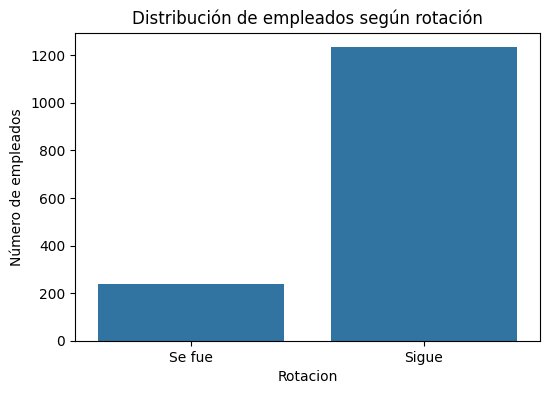

In [9]:
# Distribución de la variable objetivo (rotación)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Rotacion')
plt.title("Distribución de empleados según rotación")
plt.ylabel("Número de empleados")
plt.show()

In [10]:
print("\nPorcentaje de empleados que se fueron:")
print(df['Rotacion'].value_counts(normalize=True) * 100)


Porcentaje de empleados que se fueron:
Rotacion
Sigue     83.877551
Se fue    16.122449
Name: proportion, dtype: float64


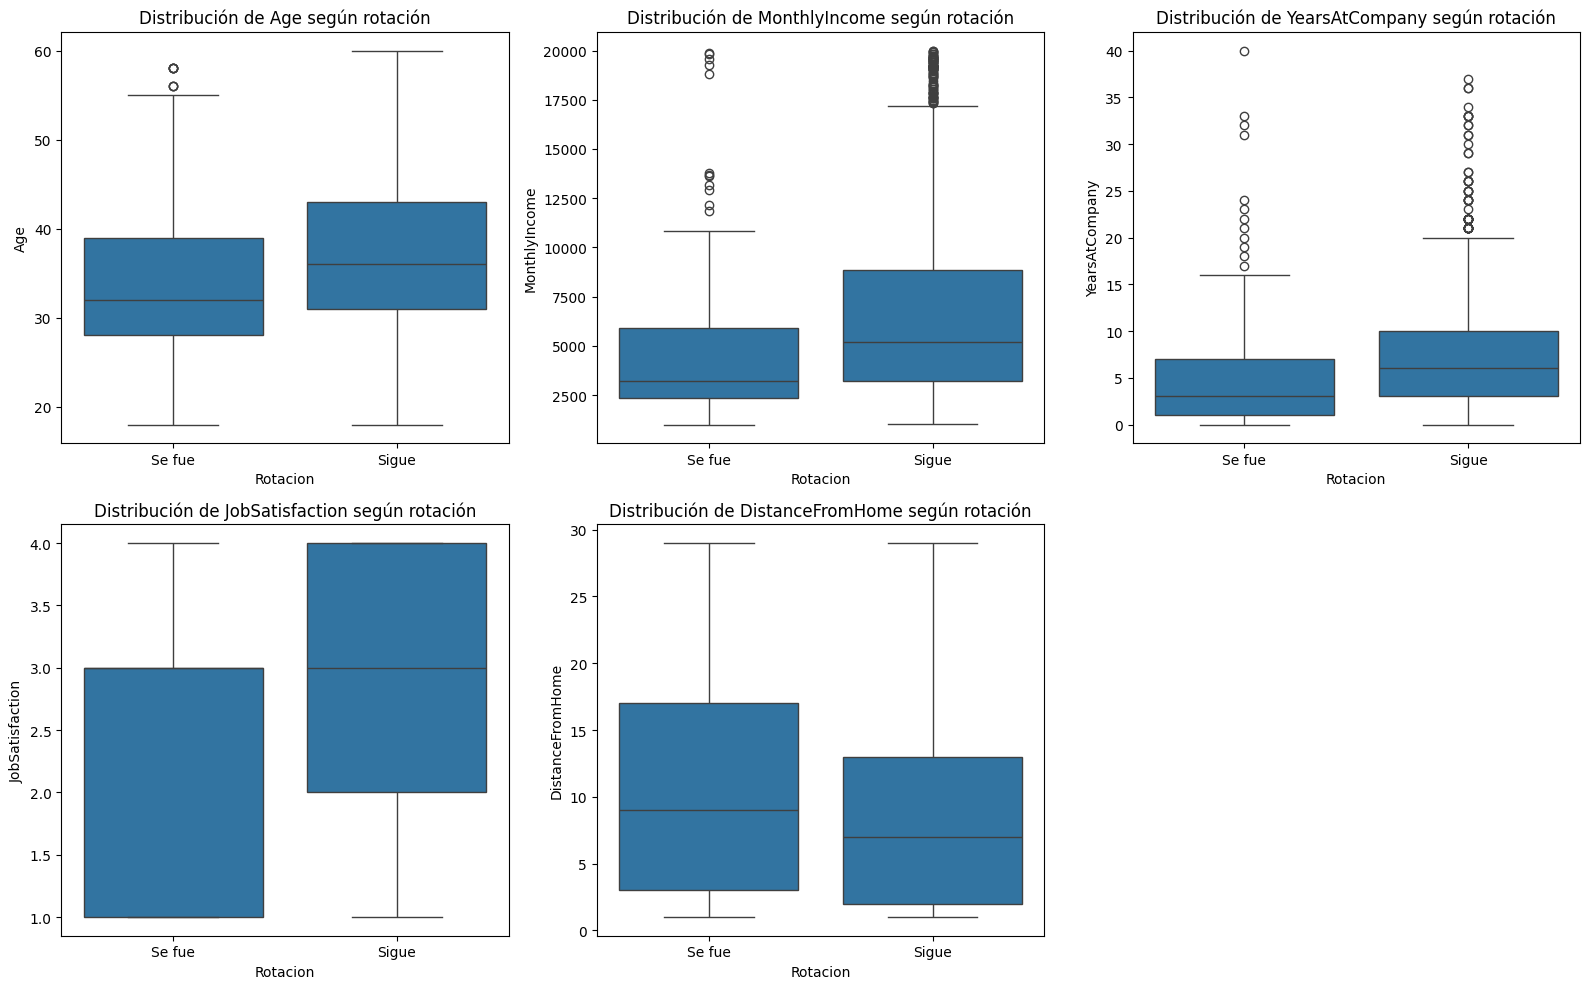

In [11]:
variables_num = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'DistanceFromHome']

# Boxplots para comparar distribuciones numéricas según rotación
plt.figure(figsize=(16, 10))
for i, var in enumerate(variables_num, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Rotacion', y=var, data=df)
    plt.title(f'Distribución de {var} según rotación')
plt.tight_layout()
plt.show()


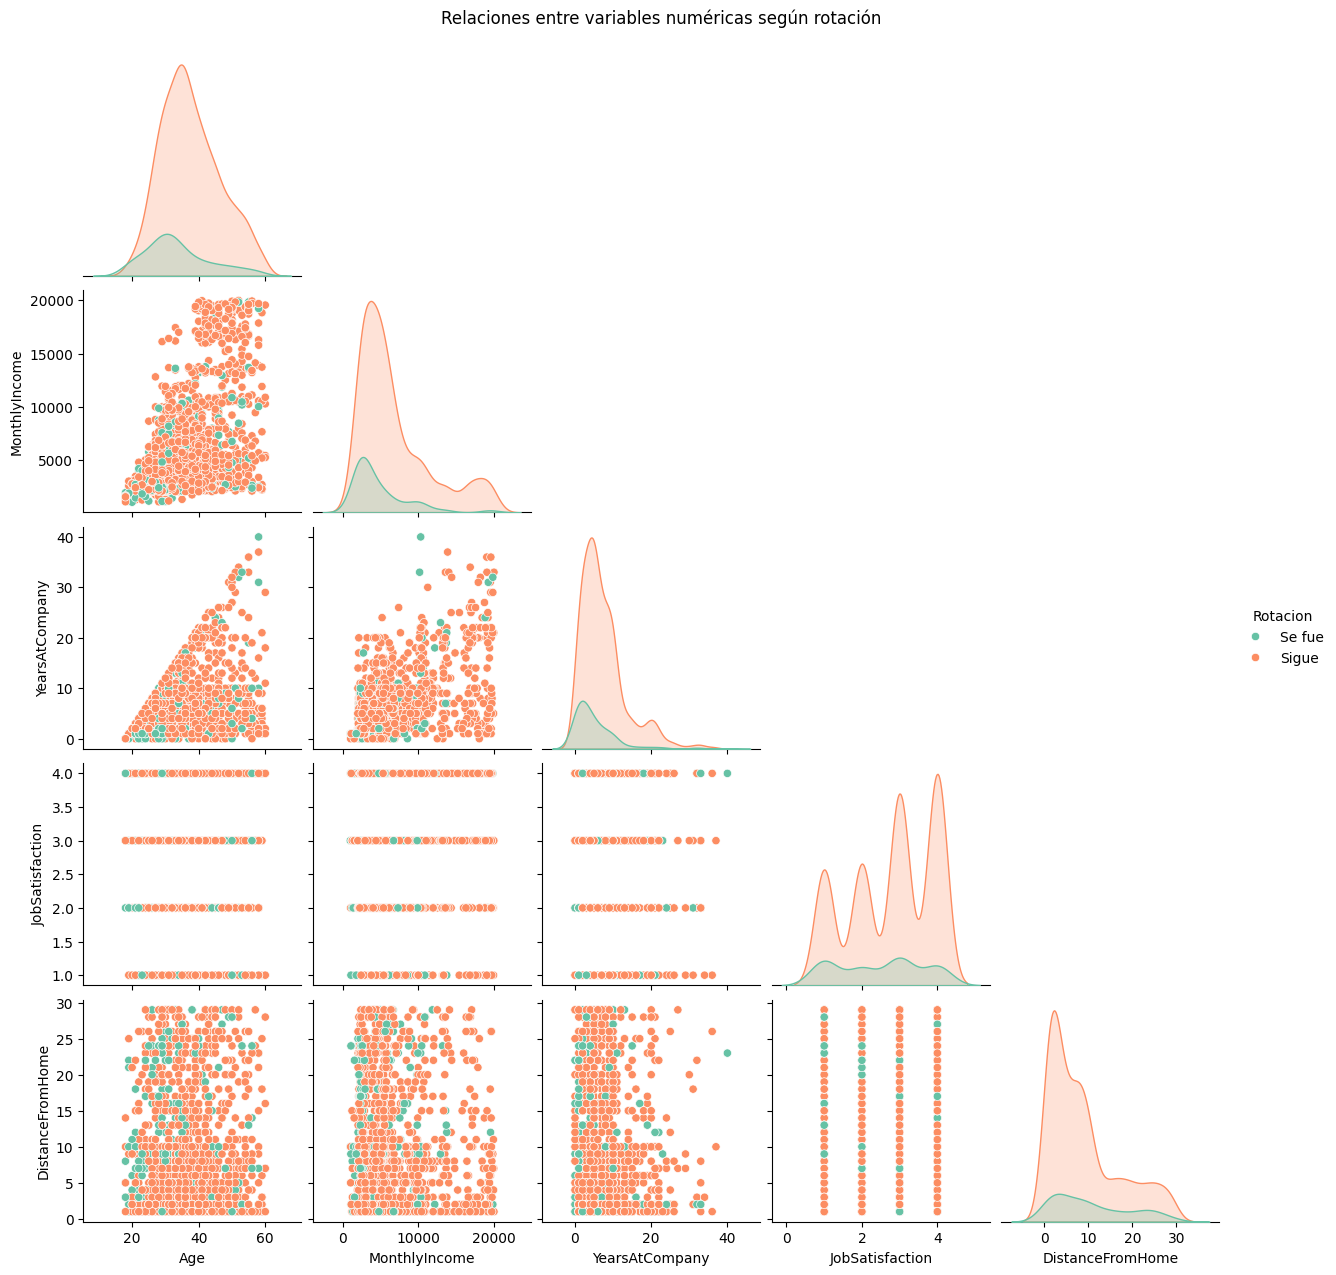

In [12]:
# Scatterplots bivariados coloreados por rotación
sns.pairplot(df, vars=variables_num, hue='Rotacion', corner=True, palette='Set2')
plt.suptitle('Relaciones entre variables numéricas según rotación', y=1.02)
plt.show()

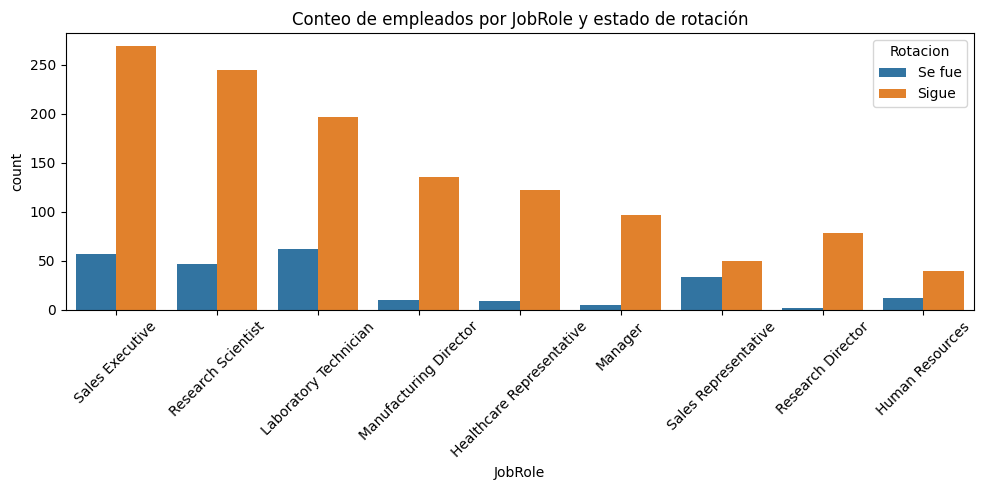

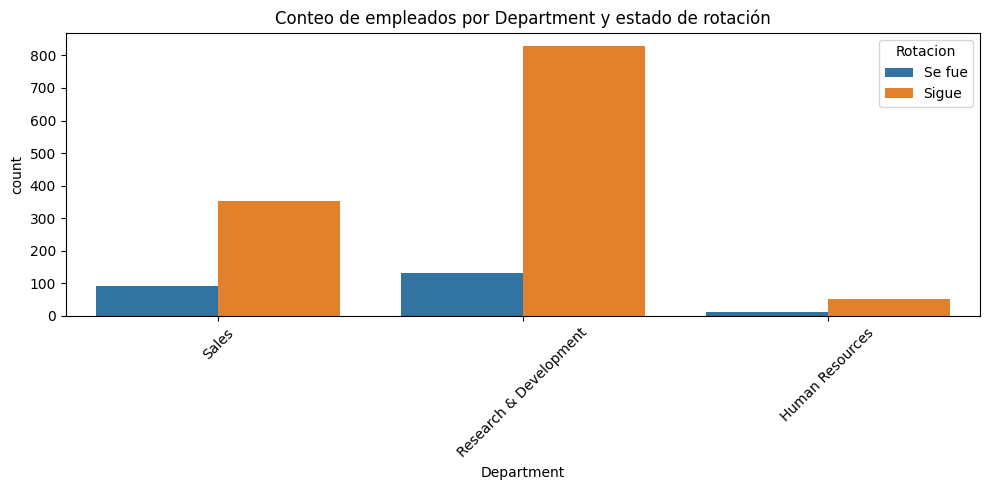

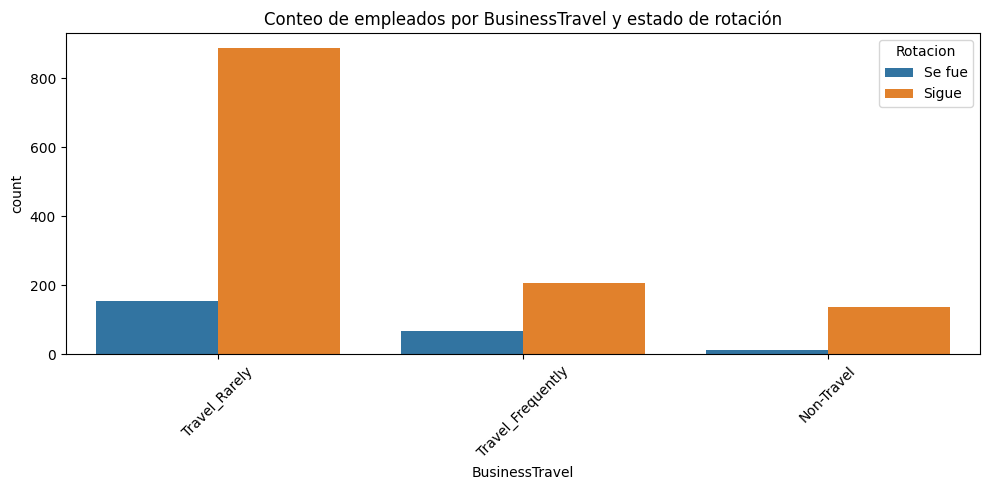

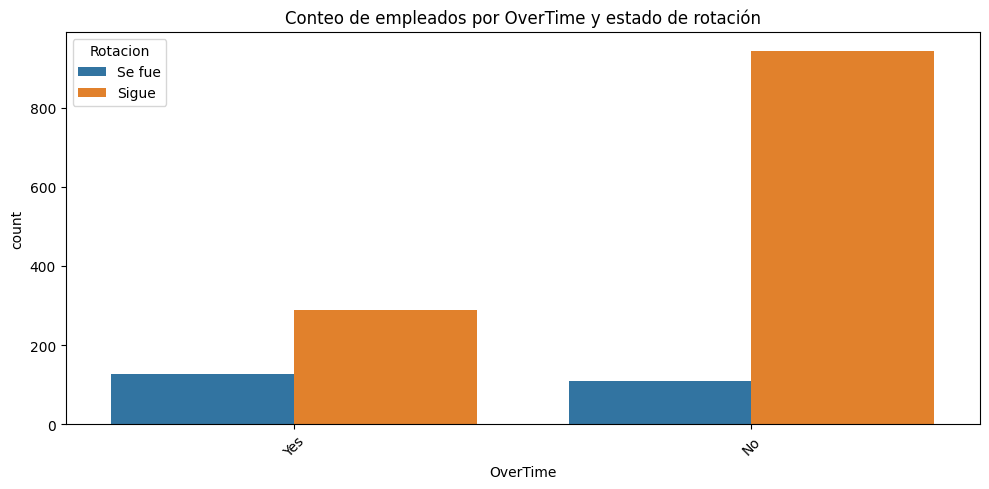

In [14]:
# Barras para variables categóricas importantes
variables_cat = ['JobRole', 'Department', 'BusinessTravel', 'OverTime']
for var in variables_cat:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=var, hue='Rotacion')
    plt.title(f'Conteo de empleados por {var} y estado de rotación')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [16]:
# Paso 4: Preprocesamiento
# ========================

# Eliminar columnas poco informativas
cols_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'Attrition', 'Rotacion']
df_model = df.drop(columns=cols_to_drop)


In [17]:
# Codificación de variables categóricas
cat_cols = df_model.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col])

In [18]:
# Variable objetivo codificada 1/0 para modelos
y = df['Attrition'].map({'Yes':1, 'No':0})

In [19]:
# Variables predictoras
X = df_model

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score

# Definición de función para evaluar recall medio
def evaluar_modelo(modelo, X_train, y_train):
    recall = cross_val_score(modelo, X_train, y_train, cv=5, scoring='recall_macro')
    return recall.mean()

modelos = {
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3),
    'KNN (k=7)': KNeighborsClassifier(n_neighbors=7),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

resultados = {nombre: evaluar_modelo(modelo, X_train, y_train) for nombre, modelo in modelos.items()}
resultados

{'KNN (k=3)': np.float64(0.5696869847283954),
 'KNN (k=7)': np.float64(0.5449315489924628),
 'Random Forest': np.float64(0.5880469131604584),
 'Gradient Boosting': np.float64(0.6323629023335141),
 'Logistic Regression': np.float64(0.6606028222378744)}

In [33]:
mejor_modelo = LogisticRegression(max_iter=1000, random_state=42)
mejor_modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [34]:
# Evaluar en test
y_pred = mejor_modelo.predict(X_test)
y_proba = mejor_modelo.predict_proba(X_test)[:, 1]

from sklearn.metrics import recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

print(f"Mejor modelo seleccionado: LogisticRegression \n")

print(f"Recall en test: {recall_score(y_test, y_pred):.4f}")
print(f"F1 score en test: {f1_score(y_test, y_pred):.4f}")
print(f"AUC ROC en test: {roc_auc_score(y_test, y_proba):.4f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Mejor modelo seleccionado: LogisticRegression 

Recall en test: 0.3830
F1 score en test: 0.4932
AUC ROC en test: 0.8059

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294

Matriz de confusión:
[[239   8]
 [ 29  18]]


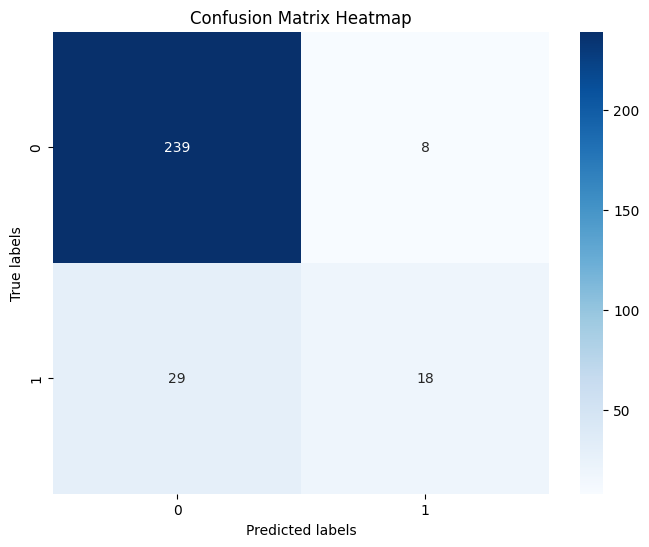

In [35]:
# Supongamos que ya tienes y_test y y_pred
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')

plt.show()

In [36]:
# Importar SMOTE
from imblearn.over_sampling import SMOTE

# Crear objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE solo al conjunto de entrenamiento
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Ver proporción de clases antes y después
print("Antes de SMOTE:", y_train.value_counts())
print("Después de SMOTE:", y_train_smote.value_counts())

# Entrenar modelo Logistic Regression simple con datos balanceados
modelo_smote = LogisticRegression(max_iter=1000, random_state=42)
modelo_smote.fit(X_train_smote, y_train_smote)

# Evaluar en test
y_pred = modelo_smote.predict(X_test)
y_proba = modelo_smote.predict_proba(X_test)[:, 1]

from sklearn.metrics import recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

print("=== Resultado con SMOTE ===")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Antes de SMOTE: Attrition
0    986
1    190
Name: count, dtype: int64
Después de SMOTE: Attrition
0    986
1    986
Name: count, dtype: int64
=== Resultado con SMOTE ===

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       247
           1       0.38      0.77      0.51        47

    accuracy                           0.77       294
   macro avg       0.66      0.77      0.68       294
weighted avg       0.86      0.77      0.79       294

Matriz de confusión:
[[189  58]
 [ 11  36]]


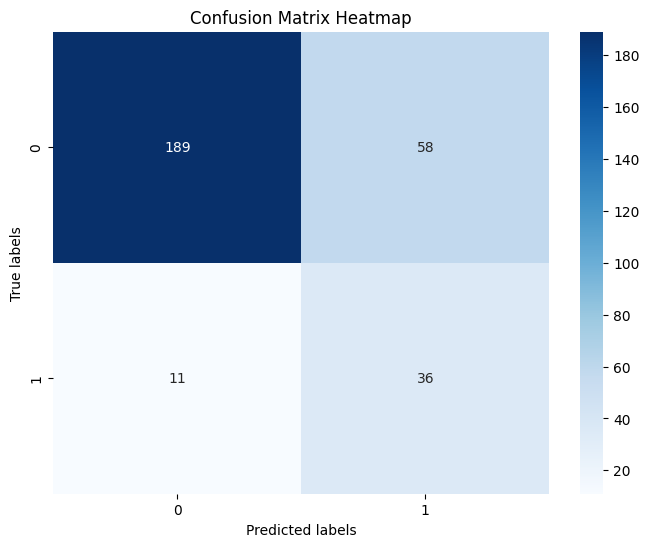

In [40]:
# Supongamos que ya tienes y_test y y_pred
cm1 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')

plt.show()

In [39]:
from imblearn.under_sampling import RandomUnderSampler

# Crear objeto undersampler
rus = RandomUnderSampler(random_state=42)

# Aplicar solo al train
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print("Antes de undersampling:", y_train.value_counts())
print("Después de undersampling:", y_train_rus.value_counts())

# Entrenar modelo Logistic Regression con datos undersampleados
modelo_rus = LogisticRegression(max_iter=1000, random_state=42)
modelo_rus.fit(X_train_rus, y_train_rus)

# Evaluar en test
y_pred = modelo_rus.predict(X_test)
y_proba = modelo_rus.predict_proba(X_test)[:, 1]

print("=== Resultado con Undersampling ===")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Antes de undersampling: Attrition
0    986
1    190
Name: count, dtype: int64
Después de undersampling: Attrition
0    190
1    190
Name: count, dtype: int64
=== Resultado con Undersampling ===

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       247
           1       0.36      0.79      0.50        47

    accuracy                           0.74       294
   macro avg       0.66      0.76      0.66       294
weighted avg       0.85      0.74      0.78       294

Matriz de confusión:
[[182  65]
 [ 10  37]]
